# PROJEKT cz3 - Modelowanie - CC
## W TYM WERSJA NA COLAB

In [1]:
# wersja na COLAB
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.image as img

In [3]:
# wersja na COLAB
df_modelcena = pd.read_csv(r"gdrive/My Drive/PROJEKT_DS/mieszkania_etap3_df.csv",encoding='utf-8')
df_modelcena = df_modelcena.drop(["Unnamed: 0"], axis=1)
df_modelcena.shape

(2167, 11)

In [0]:
# wersja nie na COLAB
#df_modelcena = pd.read_csv("mieszkania_etap3_df.csv")
# oraz od razu usuwam: Unnamed
#df_modelcena = df_modelcena.drop(["Unnamed: 0"], axis=1)
#df_modelcena.head()

In [5]:
df_modelcena.head()

,cena,forma_wlasnosci,liczba_pieter,liczba_pokoi,okna,powierzchnia,rodzaj_zabudowy,rok_budowy,rynek,stan_wykonczenia,cena_mkw_PLN
0,299000.0,1,2,2,1,40.00,1,1,1,2,7475.0
1,275709.0,1,2,3,1,48.37,1,1,1,1,5700.0
2,518891.0,1,2,4,1,79.22,2,1,1,0,6550.0
3,255000.0,1,1,3,1,50.00,1,1,1,1,5100.0
4,290457.0,1,2,3,1,49.23,1,1,1,1,5900.0


In [6]:
df_modelcena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 11 columns):
cena                2167 non-null float64
forma_wlasnosci     2167 non-null int64
liczba_pieter       2167 non-null int64
liczba_pokoi        2167 non-null int64
okna                2167 non-null int64
powierzchnia        2167 non-null float64
rodzaj_zabudowy     2167 non-null int64
rok_budowy          2167 non-null int64
rynek               2167 non-null int64
stan_wykonczenia    2167 non-null int64
cena_mkw_PLN        2167 non-null float64
dtypes: float64(3), int64(8)
memory usage: 186.3 KB


In [7]:
corr_matrix = df_modelcena.corr()
corr_matrix['cena']

cena                1.000000
forma_wlasnosci     0.112982
liczba_pieter      -0.092197
liczba_pokoi        0.658882
okna                0.098731
powierzchnia        0.781664
rodzaj_zabudowy    -0.026188
rok_budowy          0.114604
rynek               0.082209
stan_wykonczenia    0.088847
cena_mkw_PLN        0.253150
Name: cena, dtype: float64

In [8]:
corr_matrix = df_modelcena.corr()
corr_matrix['powierzchnia']

cena                0.781664
forma_wlasnosci     0.049250
liczba_pieter      -0.196748
liczba_pokoi        0.743150
okna                0.172431
powierzchnia        1.000000
rodzaj_zabudowy     0.149545
rok_budowy          0.382884
rynek               0.255118
stan_wykonczenia    0.229432
cena_mkw_PLN       -0.316120
Name: powierzchnia, dtype: float64

In [9]:
# moglabym usunac "forma_wlasnosci","rodzaj_zabudowy" - niska korelacja z cena - ale na ten moment zostawiam
# moglabym usunac kolumne "rynek" o wysokiej korelacji z "rok_budowy" - ale na ten moment zostawiam
# usuwam kolumne o wysokich korelacjach: powierzchnia i liczba pokoi --> usuwam liczba_pokoi
# usuwam cena za mkw - wczesniej planowalam ze moze bedzie to predykcja ceny za m kw, jednak zdecydowalam ze model bedzie przeiwdywal cene
df_modelcena = df_modelcena.drop(["liczba_pokoi", "cena_mkw_PLN"], axis=1)
df_modelcena=df_modelcena.astype(int)
df_modelcena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
cena                2167 non-null int64
forma_wlasnosci     2167 non-null int64
liczba_pieter       2167 non-null int64
okna                2167 non-null int64
powierzchnia        2167 non-null int64
rodzaj_zabudowy     2167 non-null int64
rok_budowy          2167 non-null int64
rynek               2167 non-null int64
stan_wykonczenia    2167 non-null int64
dtypes: int64(9)
memory usage: 152.4 KB


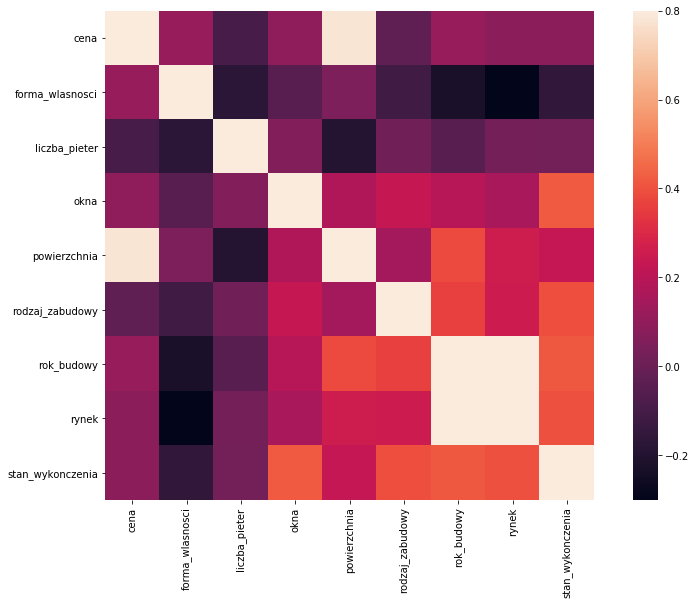

In [10]:
corrmat = df_modelcena.corr()
f,ax = plt.subplots(figsize=(14,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [0]:
# utworzenie zmiennej zaleznej
y = df_modelcena.cena
X = df_modelcena.drop(['cena'], axis = 1) .astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [0]:
# utworzenie zbioru testowego i treningowego
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
seed=2
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=4, random_state=seed)

In [0]:
# SKALOWANIE POGORSZYLO WYNIKI MODELU - WIEC NIE STOSUJE W OBECNYM ROZWIAZANIU
#from sklearn.preprocessing import StandardScaler 

#scaler = StandardScaler() 

#reg_scaler = StandardScaler().fit(X_train)
#transform_X_train = reg_scaler.transform(X_train)
#transform_X_test = reg_scaler.transform(X_test)

In [0]:
# Redukcja wymiarowosci przy uzyciu PCA. probuje n-components=6; 8 jest wartoscia maksymalna

pca = PCA(random_state = 42, n_components=6)

#z uzyciem Standard Scaler
#X_train = pca.fit_transform(transform_X_train)
#X_test = pca.transform(transform_X_test)

#bez skalera
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Przeanalizuje wybrane modele
# dobor optymalnych parametrow metoda crosswalidacji - GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [23]:
# ELASTIC NET
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.05, 0.1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
grid_1.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3675937016119.0747, tolerance: 3473809987564.7954
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3691963262704.5293, tolerance: 3686226921982.785
  positive)


{'elasticnet__alpha': 0.05, 'polynomialfeatures__degree': 2}


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('elasticnet',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.1, warm_start=False))],
         verbose=False)

In [24]:
# prezentuje wyniki modelu
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
g1_R2_train = r2_score(y_true=y_train, y_pred=grid_1.predict(X_train))
g1_R2_test = r2_score(y_true=y_test, y_pred=grid_1.predict(X_test))
g1_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_1.predict(X_train))
g1_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_1.predict(X_test))
g1_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_1.predict(X_train))
g1_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_1.predict(X_test))

print(f'R^2 train {r2_score(y_true=y_train, y_pred=grid_1.predict(X_train))}')
print(f'R^2 test {r2_score(y_true=y_test, y_pred=grid_1.predict(X_test))}')
print(f'MSE train {mean_squared_error(y_true=y_train, y_pred=grid_1.predict(X_train))}')
print(f'MSE test {mean_squared_error(y_true=y_test, y_pred=grid_1.predict(X_test))}')
print(f'MAE train {mean_absolute_error(y_true=y_train, y_pred=grid_1.predict(X_train))}')
print(f'MAE test {mean_absolute_error(y_true=y_test, y_pred=grid_1.predict(X_test))}')

R^2 train 0.7484783295048847
R^2 test 0.73241482415707
MSE train 6986516500.984286
MSE test 7469021756.421337
MAE train 53878.85635024499
MAE test 54633.24946661287


In [26]:
# REGRESJA LASSO
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'lasso__alpha': [0.001, 0.05, 0.01]},  
                    cv=kfold,
                    refit=True)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
grid_2.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3617650734181.1885, tolerance: 3473809987564.7954
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3617709538261.9985, tolerance: 3473809987564.7954
  positive)


{'lasso__alpha': 0.05, 'polynomialfeatures__degree': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3617661524931.4946, tolerance: 3473809987564.7954
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.1, warm_start=False))],
         verbose=False)

In [27]:
# prezentuje wyniki modelu
g2_R2_train = r2_score(y_true=y_train, y_pred=grid_2.predict(X_train))
g2_R2_test = r2_score(y_true=y_test, y_pred=grid_2.predict(X_test))
g2_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_2.predict(X_train))
g2_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_2.predict(X_test))
g2_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_2.predict(X_train))
g2_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_2.predict(X_test))

print(f'R^2 train {g2_R2_train}')
print(f'R^2 test {g2_R2_test}')
print(f'MSE train {g2_MSE_train}')
print(f'MSE test {g2_MSE_test}')
print(f'MAE train {g2_MAE_train}')
print(f'MAE test {g2_MAE_test}')

R^2 train 0.7490643302762845
R^2 test 0.7320690455916529
MSE train 6970239159.747983
MSE test 7478673365.931728
MAE train 53952.17536438884
MAE test 54741.51993910471


In [28]:
# REGRESJA GRZBIETOWA RIDGE
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'ridge__alpha': [0.001, 0.05, 0.01]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
grid_3.best_estimator_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.05}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.11671e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61789e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.42683e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3737e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0311e-16): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.05, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.1))],
         verbose=False)

In [29]:
# prezentuje wyniki modelu
g3_R2_train = r2_score(y_true=y_train, y_pred=grid_3.predict(X_train))
g3_R2_test = r2_score(y_true=y_test, y_pred=grid_3.predict(X_test))
g3_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_3.predict(X_train))
g3_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_3.predict(X_test))
g3_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_3.predict(X_train))
g3_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_3.predict(X_test))

print(f'R^2 train {g3_R2_train}')
print(f'R^2 test {g3_R2_test}')
print(f'MSE train {g3_MSE_train}')
print(f'MSE test {g3_MSE_test}')
print(f'MAE train {g3_MAE_train}')
print(f'MAE test {g3_MAE_test}')

R^2 train 0.7490643289781735
R^2 test 0.7320701515192545
MSE train 6970239195.805607
MSE test 7478642496.518684
MAE train 53951.98571473013
MAE test 54741.26858984583


In [30]:
# REGRESJA LINIOWA
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
# prezentuje wyniki modelu
g4_R2_train = r2_score(y_true=y_train, y_pred=grid_4.predict(X_train))
g4_R2_test = r2_score(y_true=y_test, y_pred=grid_4.predict(X_test))
g4_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_4.predict(X_train))
g4_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_4.predict(X_test))
g4_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_4.predict(X_train))
g4_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_4.predict(X_test))

print(f'R^2 train {g4_R2_train}')
print(f'R^2 test {g4_R2_test}')
print(f'MSE train {g4_MSE_train}')
print(f'MSE test {g4_MSE_test}')
print(f'MAE train {g4_MAE_train}')
print(f'MAE test {g4_MAE_test}')

R^2 train 0.7490643302857594
R^2 test 0.732068824325007
MSE train 6970239159.484798
MSE test 7478679542.078771
MAE train 53952.19318253686
MAE test 54741.539564070525


In [32]:
# SUPPORT VECTOR REGRESSION
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [100000, 500000, 1000000],
                               "gamma": [0.01, 0.1, 1.0]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
grid_5.best_estimator_

{'C': 500000, 'gamma': 0.1}


SVR(C=500000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
# prezentuje wyniki modelu
g5_R2_train = r2_score(y_true=y_train, y_pred=grid_5.predict(X_train))
g5_R2_test = r2_score(y_true=y_test, y_pred=grid_5.predict(X_test))
g5_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_5.predict(X_train))
g5_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_5.predict(X_test))
g5_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_5.predict(X_train))
g5_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_5.predict(X_test))

print(f'R^2 train {g5_R2_train}')
print(f'R^2 test {g5_R2_test}')
print(f'MSE train {g5_MSE_train}')
print(f'MSE test {g5_MSE_test}')
print(f'MAE train {g5_MAE_train}')
print(f'MAE test {g5_MAE_test}')

R^2 train 0.9110710406669305
R^2 test 0.7494273042160713
MSE train 2470179370.9179306
MSE test 6994157693.824871
MAE train 21616.273152198435
MAE test 41599.31395574272


In [38]:
# LASY LOSOWE - RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [1200, 1300, 1400],
                    'max_features': ['log2'],  # zawsze wybiera 'log2' - dlatego usuwam: 'auto', 'sqrt'
                    'max_depth': [10, 15, 20]
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
grid_6.best_estimator_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 1300}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1300,
                      n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [39]:
# prezentuje wyniki modelu
g6_R2_train = r2_score(y_true=y_train, y_pred=grid_6.predict(X_train))
g6_R2_test = r2_score(y_true=y_test, y_pred=grid_6.predict(X_test))
g6_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_6.predict(X_train))
g6_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_6.predict(X_test))
g6_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_6.predict(X_train))
g6_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_6.predict(X_test))

print(f'R^2 train {g6_R2_train}')
print(f'R^2 test {g6_R2_test}')
print(f'MSE train {g6_MSE_train}')
print(f'MSE test {g6_MSE_test}')
print(f'MAE train {g6_MAE_train}')
print(f'MAE test {g6_MAE_test}')

R^2 train 0.9655767777400038
R^2 test 0.8077332082428869
MSE train 956173716.0185708
MSE test 5366683136.117206
MAE train 17928.503765053178
MAE test 39295.381189721535


In [40]:
# XG BOOST
import xgboost as xgb
# wyciagamy parametry do zmiennej

params = {
    "n_estimators": range(2, 3, 5),   # nie zmniejszam na nizej niz 2
    "max_depth": range (1, 3, 4),
    "learning_rate": [0.01, 0.1, 1] 
}

xg_r = xgb.XGBClassifier(random_state=42)

grid_7 = GridSearchCV(estimator=xg_r, param_grid=params, n_jobs=-1,
                      refit=True, # najlepsze wyniki
                      #verbose=10,  # progres
                      scoring="r2") 

grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
grid_7.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 2}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=2, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# wyniki XGBoosta
g7_R2_train = r2_score(y_true=y_train, y_pred=grid_7.predict(X_train))
g7_R2_test = r2_score(y_true=y_test, y_pred=grid_7.predict(X_test))
g7_MSE_train = mean_squared_error(y_true=y_train, y_pred=grid_7.predict(X_train))
g7_MSE_test = mean_squared_error(y_true=y_test, y_pred=grid_7.predict(X_test))
g7_MAE_train = mean_absolute_error(y_true=y_train, y_pred=grid_7.predict(X_train))
g7_MAE_test = mean_absolute_error(y_true=y_test, y_pred=grid_7.predict(X_test))

print(f'R^2 train {g7_R2_train}')
print(f'R^2 test {g7_R2_test}')
print(f'MSE train {g7_MSE_train}')
print(f'MSE test {g7_MSE_test}')
print(f'MAE train {g7_MAE_train}')
print(f'MAE test {g7_MAE_test}')

R^2 train 0.2331754874120826
R^2 test 0.28007019113841947
MSE train 21300081619.244663
MSE test 20095176754.63364
MAE train 95315.16503173688
MAE test 90882.70276497696


In [42]:
# DODATKOWO XGBOOST - BEZ KROSWALIDACJI - Z WIEKSZA ILOSCIA PARAMETROW 
import xgboost as xgb
# XGBoost bez kroswalidacji
xgb_r = xgb.XGBRegressor(
    colsample_bytree = 0.6,
    gamma = 0,
    learning_rate = 0.05,
    max_depth = 5,
    min_child_weight=1.5,
    n_estimators=1000,
    reg_alpha=0.75,
    reg_lambda=0.45,
    subsample=0.6,
    seed=42,
    nthread=2,
    n_jobs=-1
)

xgb_r.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=2, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [43]:
# dodatkowo - wyniki XGBoost bez kroswalidacji
xgb_r_R2_train = r2_score(y_true=y_train, y_pred=xgb_r.predict(X_train))
xgb_r_R2_test = r2_score(y_true=y_test, y_pred=xgb_r.predict(X_test))
xgb_r_MSE_train = mean_squared_error(y_true=y_train, y_pred=xgb_r.predict(X_train))
xgb_r_MSE_test = mean_squared_error(y_true=y_test, y_pred=xgb_r.predict(X_test))
xgb_r_MAE_train = mean_absolute_error(y_true=y_train, y_pred=xgb_r.predict(X_train))
xgb_r_MAE_test = mean_absolute_error(y_true=y_test, y_pred=xgb_r.predict(X_test))

print(f'R^2 train {xgb_r_R2_train}')
print(f'R^2 test {xgb_r_R2_test}')
print(f'MSE train {xgb_r_MSE_train}')
print(f'MSE test {xgb_r_MSE_test}')
print(f'MAE train {xgb_r_MAE_train}')
print(f'MAE test {xgb_r_MAE_test}')

R^2 train 0.9851531832428626
R^2 test 0.8059383709743828
MSE train 412399973.5555381
MSE test 5416781870.344402
MAE train 12250.953368436238
MAE test 39299.566982286866


#  WYNIKI MODELOWANIA

In [66]:
from sklearn import  metrics


models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('XGB_GridCV', grid_7.best_estimator_))

r2 = []
r2_train = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2_train: {}".format(metrics.r2_score(y_train, model.predict(X_train)) ))
    print("R^2_test: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    r2_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2_train: 0.7484783295048847
R^2_test: 0.73241482415707
Explained variance score: 0.7325555861527397
Median absolute error: 35149.898906133196
Mean squared error: 7469021756.421337
Mean absolute errors: 54633.24946661287
Lasso
R^2_train: 0.7490643302762845
R^2_test: 0.7320690455916529
Explained variance score: 0.732277968162675
Median absolute error: 34421.10976379295
Mean squared error: 7478673365.931728
Mean absolute errors: 54741.51993910471
Ridge
R^2_train: 0.7490643289781735
R^2_test: 0.7320701515192545
Explained variance score: 0.7322789682395834
Median absolute error: 34423.26212558284
Mean squared error: 7478642496.518684
Mean absolute errors: 54741.26858984583
LR
R^2_train: 0.7490643302857594
R^2_test: 0.732068824325007
Explained variance score: 0.7322777545546943
Median absolute error: 34420.825996072876
Mean squared error: 7478679542.078771
Mean absolute errors: 54741.539564070525
SVR
R^2_train: 0.9110710406669305
R^2_test: 0.7494273042160713
Explained variance s

In [67]:
# tabelaryczne przedstawienie wynikow
import pandas as pd
m = {'r2_train': r2_train,
     'r2': r2,
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=m)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso', 'Ridge','LR','SVR','RFR','XGB_GridCV'])
df

,Method,r2_train,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.748478,0.732415,0.732556,35149.898906,7.469022e+09,54633.249467
1,Lasso,0.749064,0.732069,0.732278,34421.109764,7.478673e+09,54741.519939
2,Ridge,0.749064,0.732070,0.732279,34423.262126,7.478642e+09,54741.268590
3,LR,0.749064,0.732069,0.732278,34420.825996,7.478680e+09,54741.539564
4,SVR,0.911071,0.749427,0.750239,19092.587653,6.994158e+09,41599.313956
5,RFR,0.965577,0.807733,0.807766,15516.995106,5.366683e+09,39295.381190
6,XGB_GridCV,0.233175,0.280070,0.283113,56075.000000,2.009518e+10,90882.702765


In [68]:
# dodaje do zbiorczej tabeli wyniki XGBoost BEZ kroswalidacji GridSearchCV

a = metrics.r2_score(y_train, xgb_r.predict(X_train))
b = metrics.r2_score(y_test, xgb_r.predict(X_test))
c = metrics.explained_variance_score(y_test, xgb_r.predict(X_test))
d = metrics.median_absolute_error(y_test, xgb_r.predict(X_test))
e = metrics.mean_squared_error(y_test, xgb_r.predict(X_test))
f = metrics.mean_absolute_error(y_test, xgb_r.predict(X_test))
    
df.loc[7] = ['XGB_no_GridCV', a, b, c, d, e, f]
df

,Method,r2_train,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.748478,0.732415,0.732556,35149.898906,7.469022e+09,54633.249467
1,Lasso,0.749064,0.732069,0.732278,34421.109764,7.478673e+09,54741.519939
2,Ridge,0.749064,0.732070,0.732279,34423.262126,7.478642e+09,54741.268590
3,LR,0.749064,0.732069,0.732278,34420.825996,7.478680e+09,54741.539564
4,SVR,0.911071,0.749427,0.750239,19092.587653,6.994158e+09,41599.313956
5,RFR,0.965577,0.807733,0.807766,15516.995106,5.366683e+09,39295.381190
6,XGB_GridCV,0.233175,0.280070,0.283113,56075.000000,2.009518e+10,90882.702765
7,XGB_no_GridCV,0.985153,0.805938,0.805973,17048.937500,5.416782e+09,39299.566982


Wspolczynnik R^2 na train i test, czyli jakosc dopasowania modeli do proby, najlepszy jest dla RFR i XGBoost nie w ramach kroswalidacji z uzyciem GridSearchCV. Wartosci te sa najwyzsze (najblizsze 1).
Najnizsze miary bledow dopasowania okreslajace stopien odchylenia dopasowanej ceny od rzeczywistej ceny sa rowniez na tych modelach.
Jako najlepszy oceniam model RFR - najlepsze R^2 na test oraz najnizsze median i mean absolut error.

Model XGBoost z uyciem kroswalidacji GridSearch CV nie wykazal dobrych wynikow z uwagi na ograniczony i malo trafny i dobor zakresow parametrow podanych do kroswalidacji.